# Account study

The purpose of this study is to find useful information about the accounts that over the months, have published information about the covid vaccine in Italy.

More precisely, the idea is to identify "important" noVax accounts, that is very present in the dataset, that in the course of this notebook I will call "suspicious accounts".

A person will be identified as "noVax" is, according to [treccani](https://www.treccani.it/vocabolario/antivaccinismo_res-5b408ba3-8991-11e8-a7cb-00271042e8d9_%28Neologismi%29/#:~:text=antivaccinismo%20s.%20m.%20Convinzione%20e%20posizione,popolazione%20infantile%20alla%20profilassi%20vaccinale.&text=Derivato%20dal%20s.%20m.%20vaccino2,1%20e%20del%20suffisso%20%2Dismo), "Conviction and position of those who are against vaccination and, in particular, the fact of subjecting the infant population to vaccine prophylaxis".

## Import

In [1]:
import pandas as pd
import json
from collections import Counter

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import account_util as ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['user_id','user_created_at','user_screen_name','user_mentions','created_at','user_verified',
                         'user_url_cred'])


In [3]:
df['user_created_at'] = pd.to_datetime(df['user_created_at'], format="%a %b %d %X %z %Y")
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053201 entries, 0 to 4053200
Data columns (total 7 columns):
 #   Column            Dtype              
---  ------            -----              
 0   created_at        datetime64[ns, UTC]
 1   user_id           int64              
 2   user_screen_name  object             
 3   user_verified     bool               
 4   user_created_at   datetime64[ns, UTC]
 5   user_mentions     object             
 6   user_url_cred     float64            
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(1), object(2)
memory usage: 189.4+ MB


In [5]:
dfAccount = pd.DataFrame()

df1 = df.groupby(['user_screen_name']).sum()
df1.loc[:,df1.columns[df1.columns.str.contains('id', regex=False)==False]]

dfAccount['user_verified'] = df1['user_verified']>0 
dfAccount['created_at'] = df.groupby('user_screen_name').first()['user_created_at']

### General info study

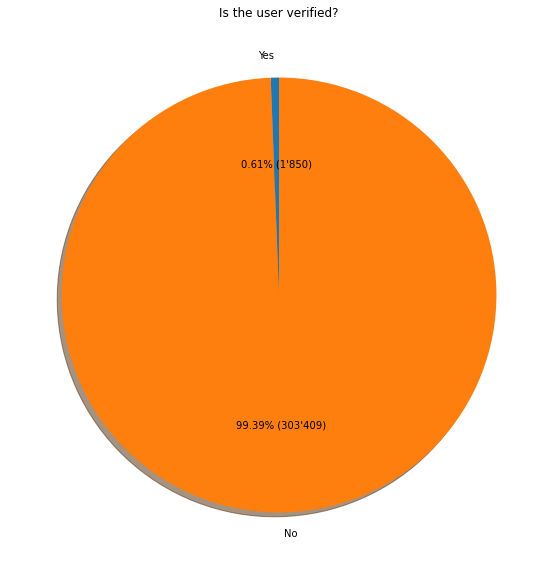

"Total users: 305'259"

In [6]:
#How many users verify the account (absolute)
values = [sum(dfAccount['user_verified']), len(dfAccount) - sum(dfAccount['user_verified'])]
names = ['Yes', 'No']

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=90)

plt.title("Is the user verified?")
plt.show()
"Total users: {:,}".format(len(dfAccount)).replace(',', '\'')

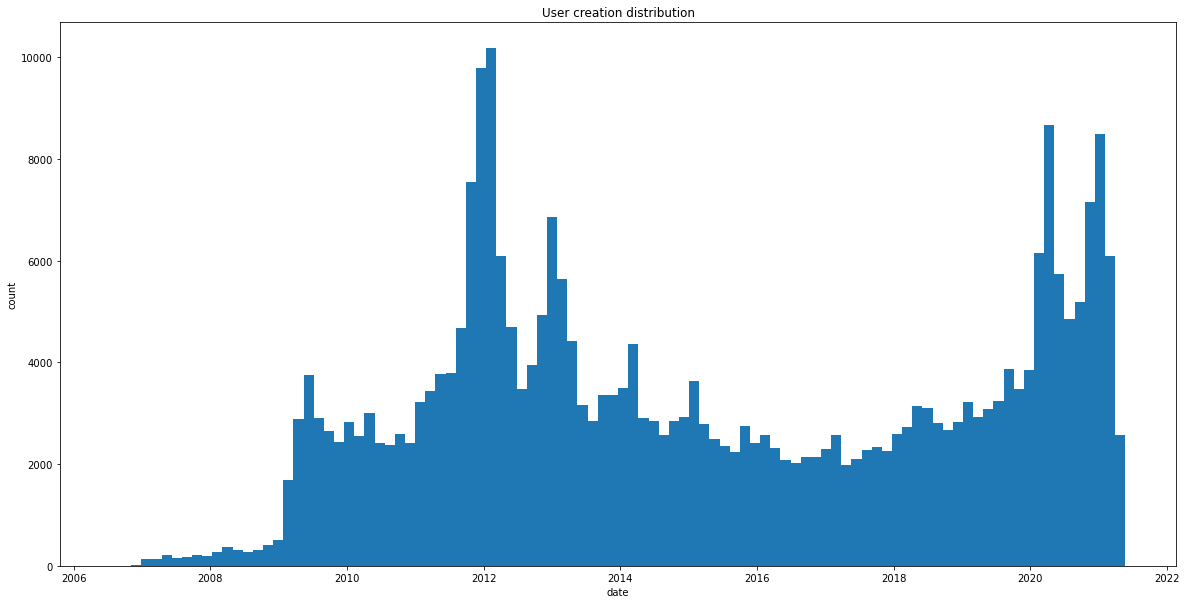

In [7]:
#User creation distribution
plt.figure(figsize=(20,10))
plt.hist(dfAccount["created_at"],bins=100)

plt.xlabel('date')
plt.ylabel('count')
plt.title('User creation distribution')
plt.show()

From the graph above, we can see two important peaks in 2012 and 2020 and a significant growth in the number of profiles created in 2009.
The first growth, which dates back to 2009, is due to the introduction (along with French, German and Spanish) of Italian as an active language. 

Then, in 2012, twitter for the first time beat a news of institutional importance well in advance of the traditional media: the death of President Emeritus Oscar Luigi Scalfaro. This led to an increase, especially in Italy, of Twitter subscriptions.

Finally, towards the end of March 2020, especially in Italy, there was a strict lockdown due to Covid. This lockdown, that forced everyone at home, has led to an increase in subscriptions to social networks, including Twitter, to fill the moments of boredom.

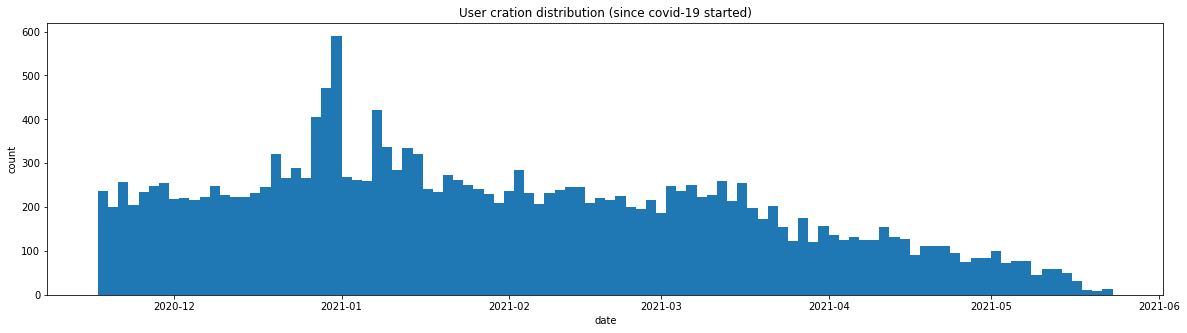

In [8]:
#When the most user are created (since covid-19 started) 
date = "2020-11-17" # --> The first case of infection ascertained by COVID-19 is recorded

df1 = dfAccount[(dfAccount['created_at']> date)] 

plt.figure(figsize=(20,5))
plt.hist(df1["created_at"],bins=100)

plt.xlabel('date')
plt.ylabel('count')
plt.title('User cration distribution (since covid-19 started)')
plt.show()

### General study (tweet, retweet, replies)

#### Definition lists of intresting users

In [9]:
with open('../1_Dataset_preparation/listControlledUsers.json','r') as file_object:  
    data = json.load(file_object)  

listNovax = data['Novax']
listLinkLow = data['link_low']
listProvax = data['Provax']


### All type of posts

In [10]:
#Perparation i df grouped by name
dfTweetByName = pd.DataFrame(df.loc[:,'user_screen_name'])
dfTweetByName = ut.get_df_raggruped(dfTweetByName,'tweet_count','user_screen_name')
dfTweetByName = ut.add_user_type(dfTweetByName,listNovax,listProvax,listLinkLow)
dfTweetByName

,tweet_count,user_type
user_screen_name,,
infoitinterno,17259,Not defined
infoitsalute,15853,Not defined
zazoomblog,6033,Not defined
infoiteconomia,6023,Not defined
Piero42395724,4803,Novax
...,...,...
dallacostagwh,1,Not defined
HallMack2,1,Not defined
HalitShtini,1,Not defined


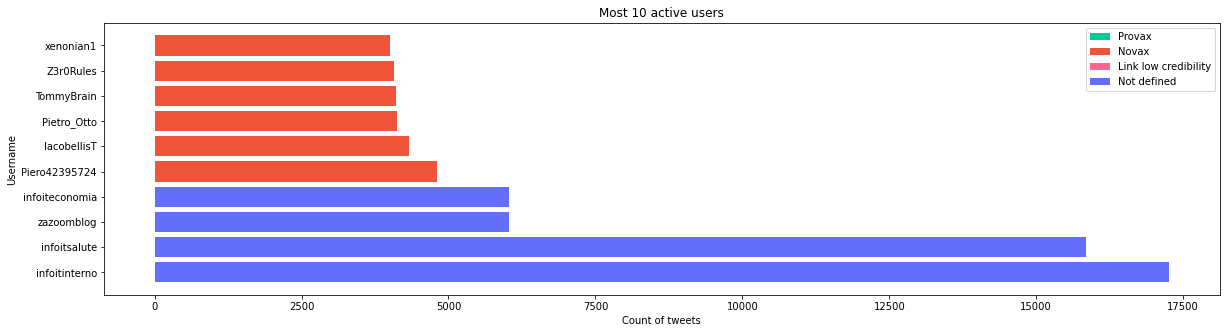

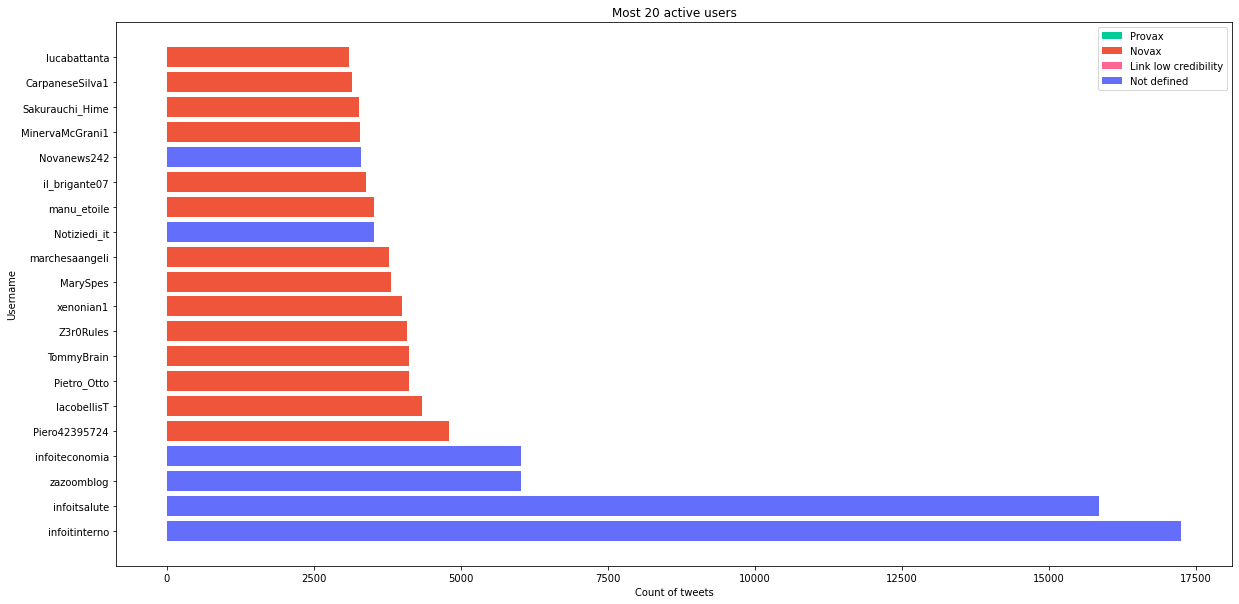

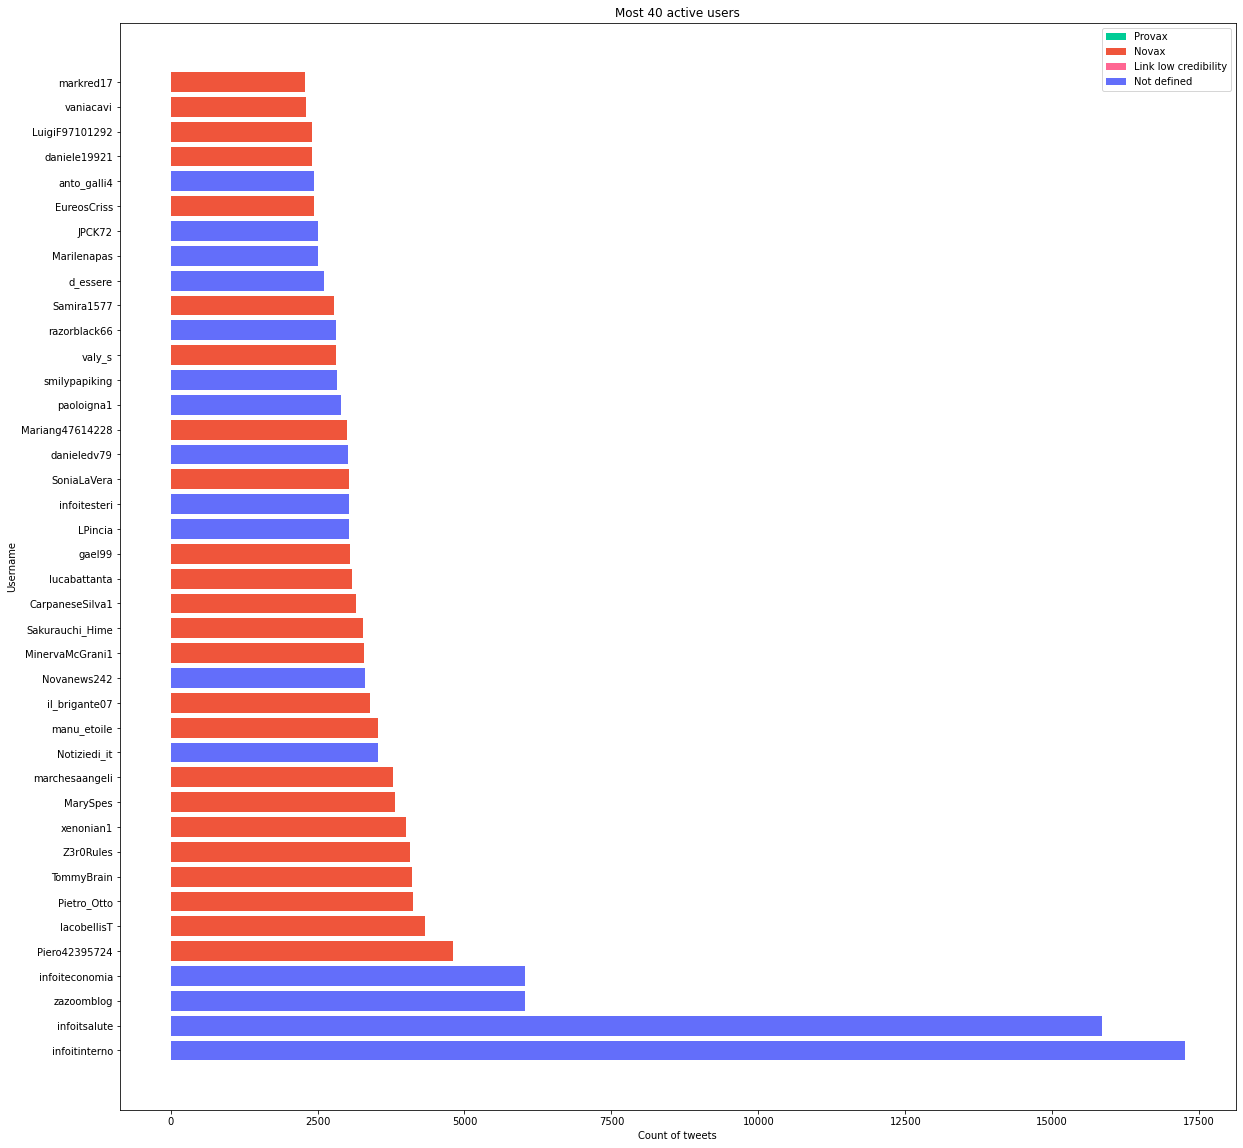

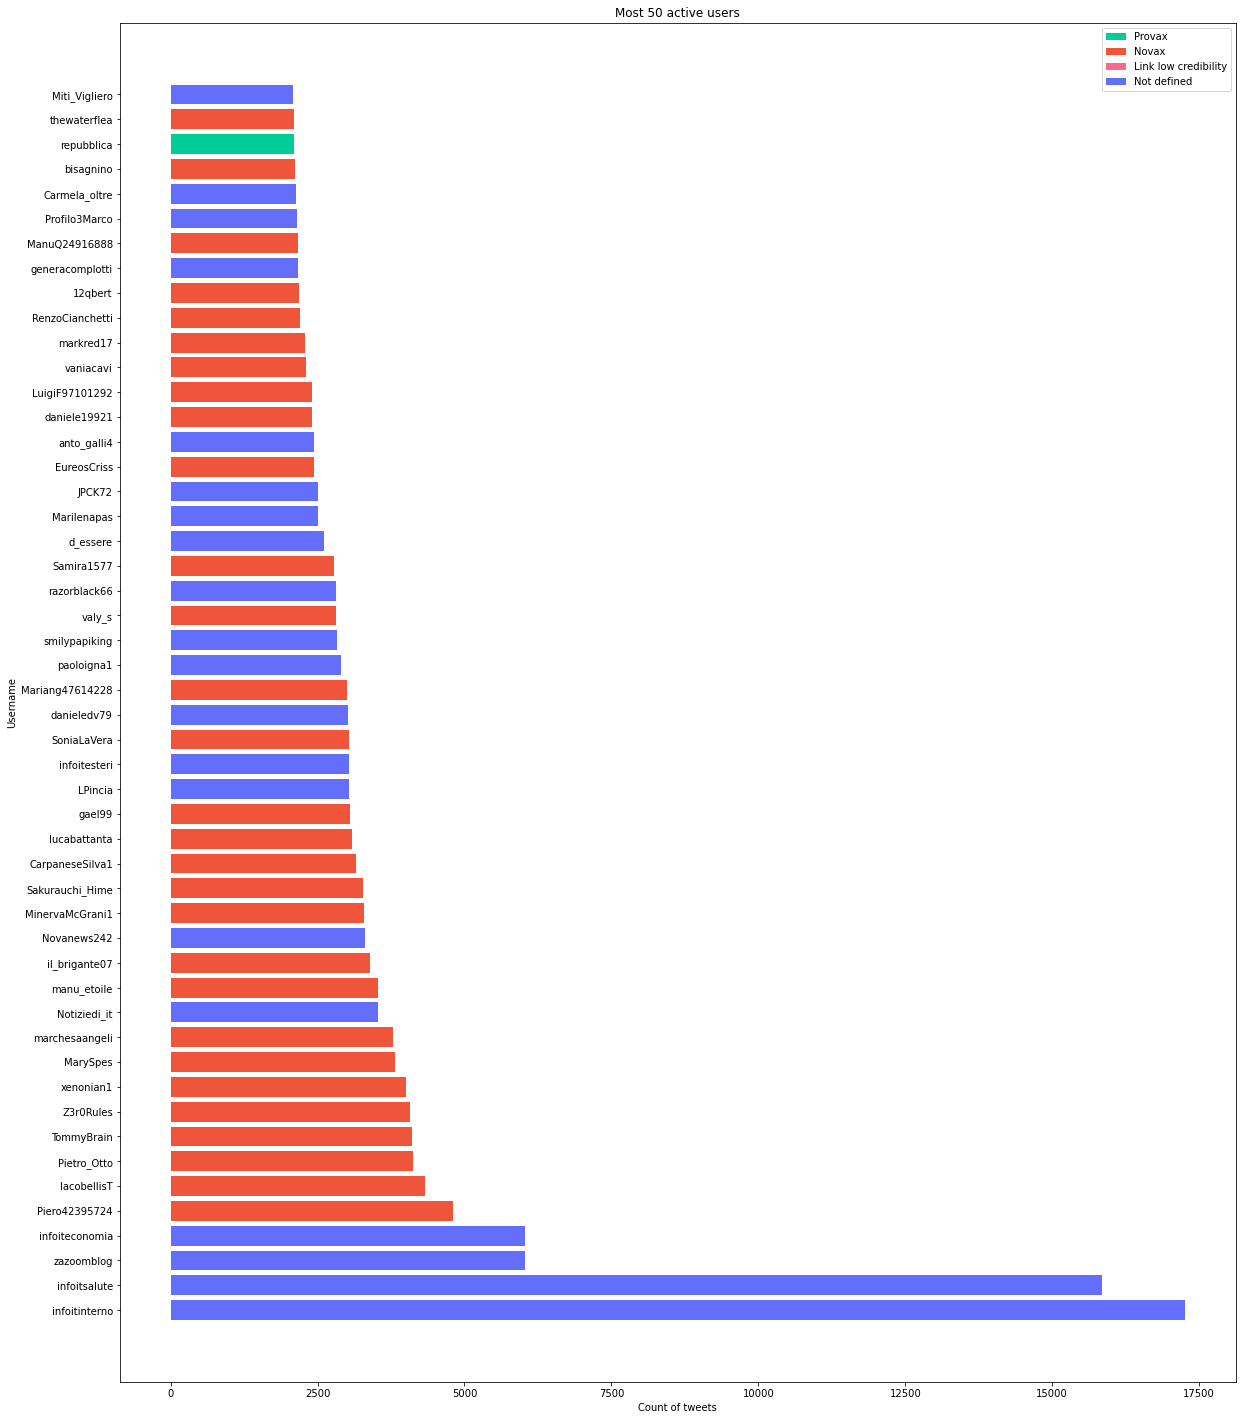

In [11]:
#Show the most active user (in general)
for i in (10,20,40,50):
    ut.print_histogram_users(dfTweetByName,i,'tweet_count','Most %d active users'%i,'Count of tweets')

### Tweet study

In [12]:
# get top 20 most frequent Tweet account
df_tweets = pd.read_csv('../Tweet_split_type/tweets.csv')
df_tweets = ut.get_df_raggruped(df_tweets,'tweet_count','user_screen_name')
df_tweets = ut.add_user_type(df_tweets,listNovax,listProvax,listLinkLow)
df_tweets

,tweet_count,user_type
user_screen_name,,
infoitinterno,17259.0,Not defined
infoitsalute,15853.0,Not defined
zazoomblog,6033.0,Not defined
infoiteconomia,6023.0,Not defined
IacobellisT,3814.0,Novax
...,...,...
Stellamares95,1.0,Not defined
Stelladiana101,1.0,Not defined
Stella_Ssj,1.0,Not defined


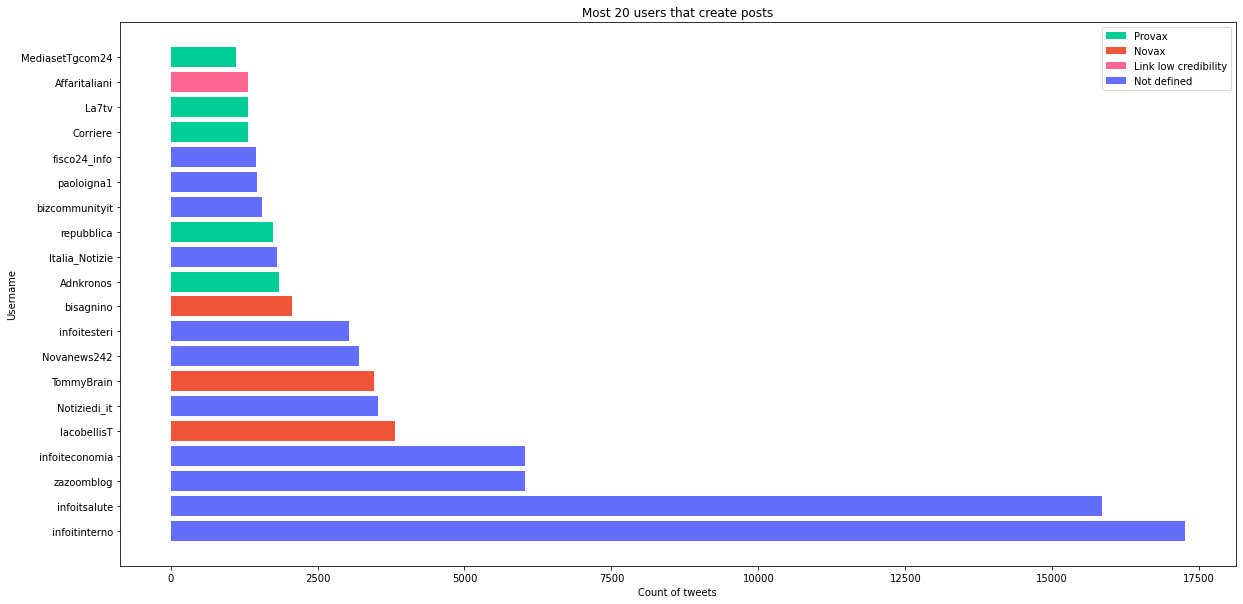

In [13]:
ut.print_histogram_users(df_tweets,20,'tweet_count','Most %d users that create posts'%20,'Count of tweets')

### Retweet study

In [14]:
retweet = pd.read_csv('../Tweet_split_type/retweet.csv',low_memory=False)
df_retweet = pd.DataFrame()
df_retweet['all_rt']  = retweet.groupby('rt_user_screen_name').count()['user_id']
df_retweet['self_rt'] = retweet.groupby('rt_user_screen_name').sum()['is_self_rt']
df_retweet['real_rt'] = df_retweet['all_rt'] - df_retweet['self_rt']
df_retweet.sort_values('real_rt',ascending=False,inplace=True)

df_retweet = ut.add_user_type(df_retweet,listNovax,listProvax,listLinkLow)
df_retweet

,all_rt,self_rt,real_rt,user_type
rt_user_screen_name,,,,
RobertoBurioni,65929,0,65929,Provax
MinervaMcGrani1,26481,0,26481,Novax
valy_s,20091,1,20090,Novax
BarbaraRaval,20107,35,20072,Novax
ImolaOggi,20105,99,20006,Not defined
...,...,...,...,...
ScimecaManuel,1,1,0,Not defined
ldblive,1,1,0,Not defined
thor93039928,1,1,0,Not defined


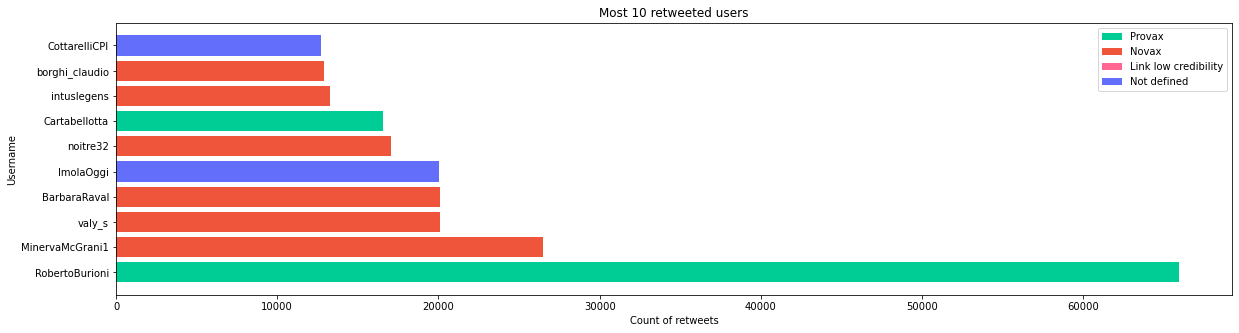

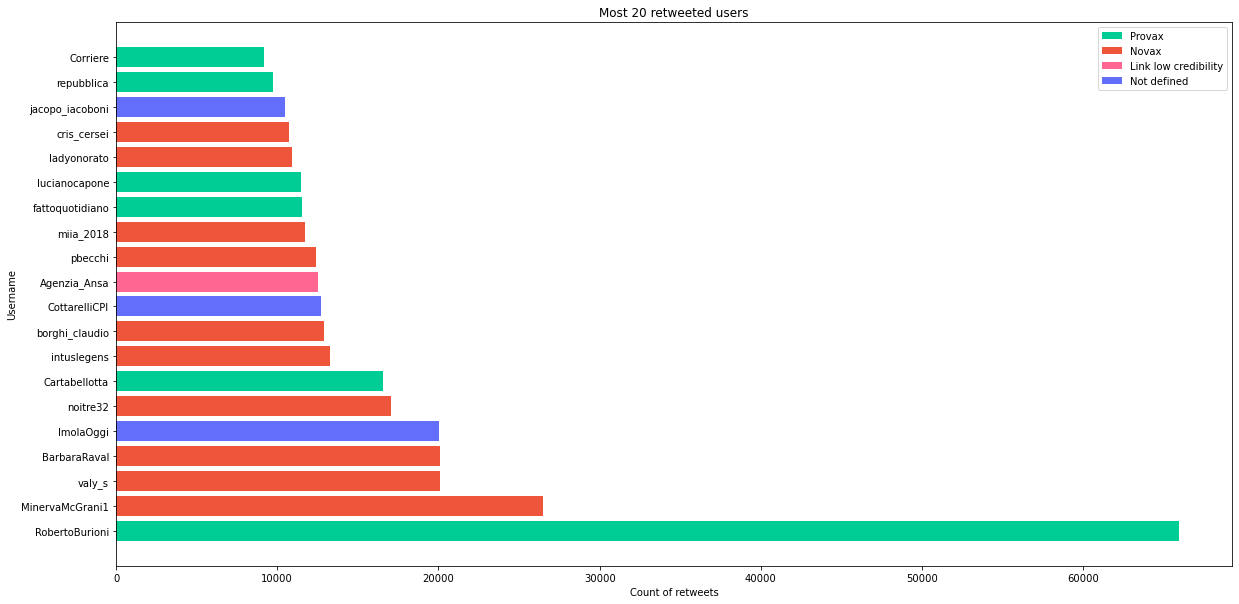

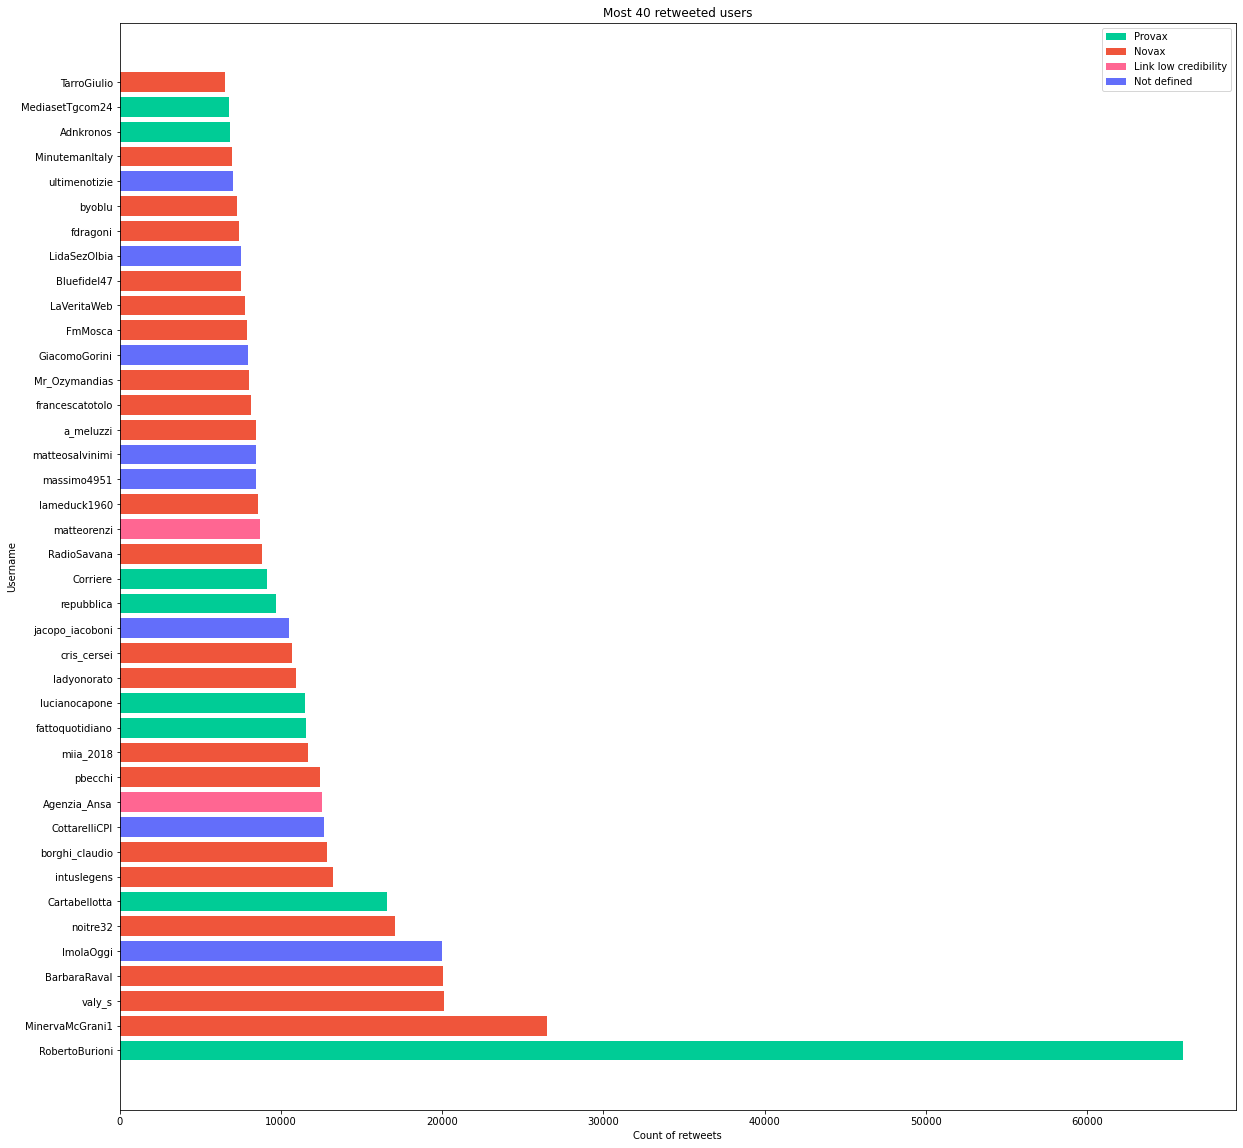

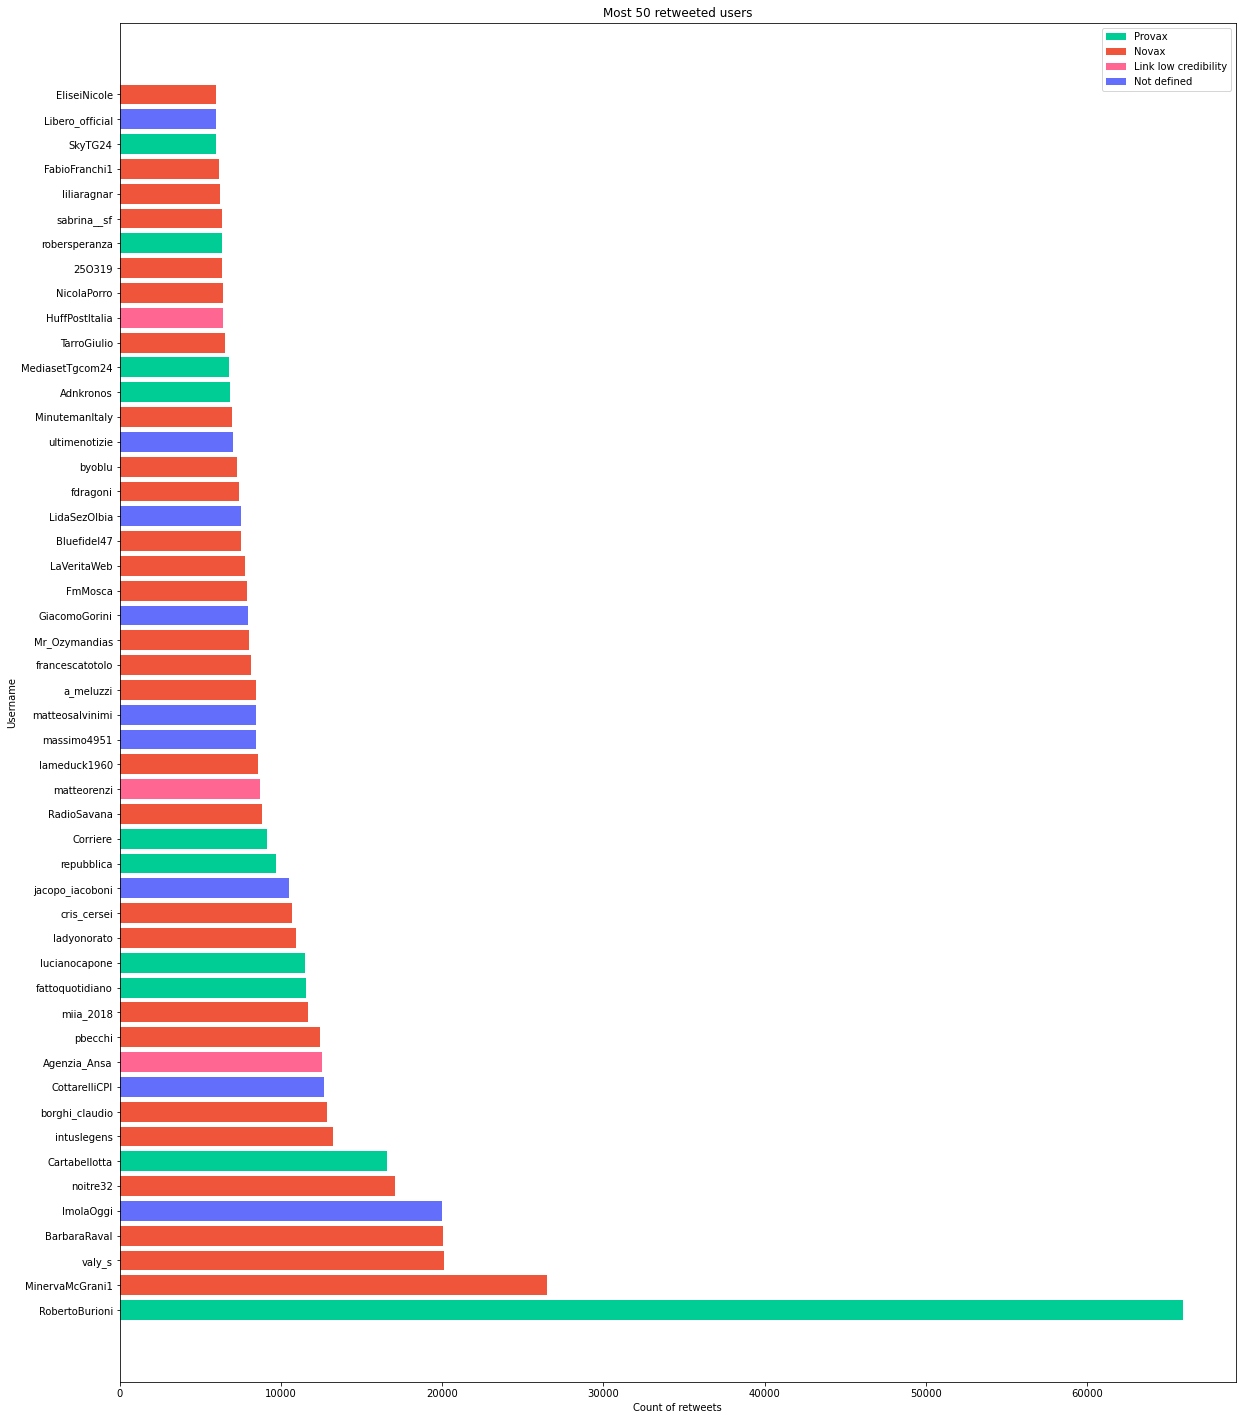

In [15]:
for i in (10,20,40,50):
        ut.print_histogram_users(df_retweet,i,'real_rt','Most %d retweeted users'%i,'Count of retweets')

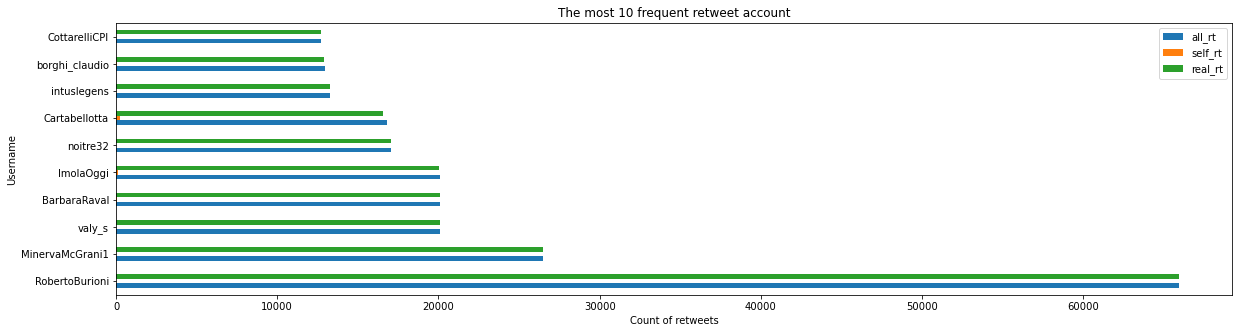

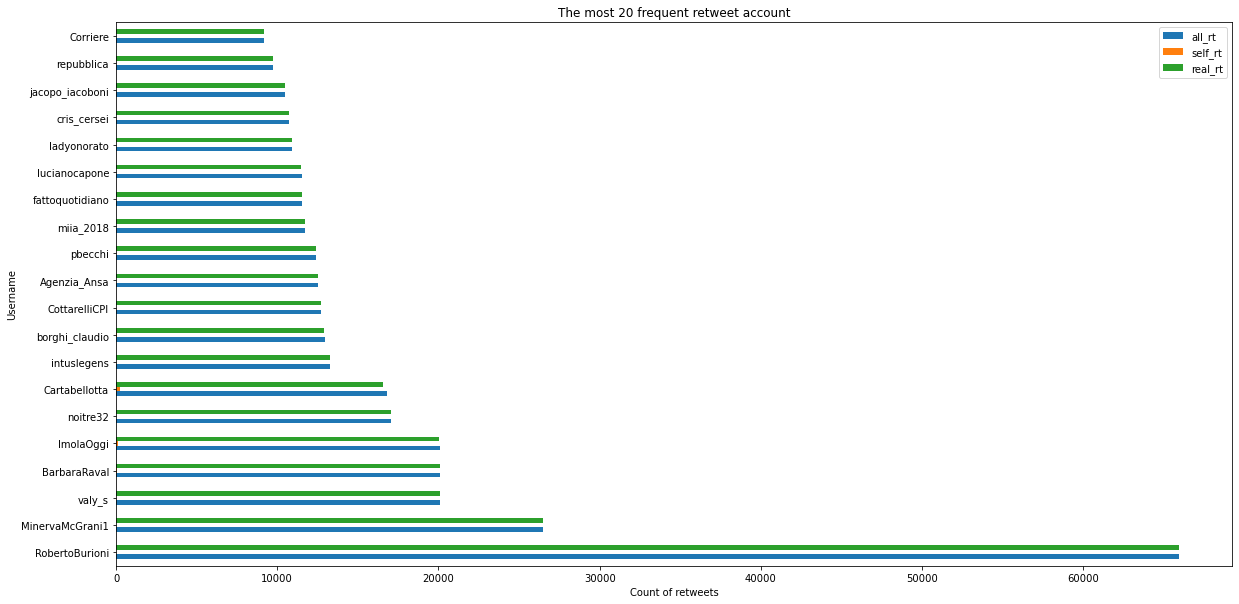

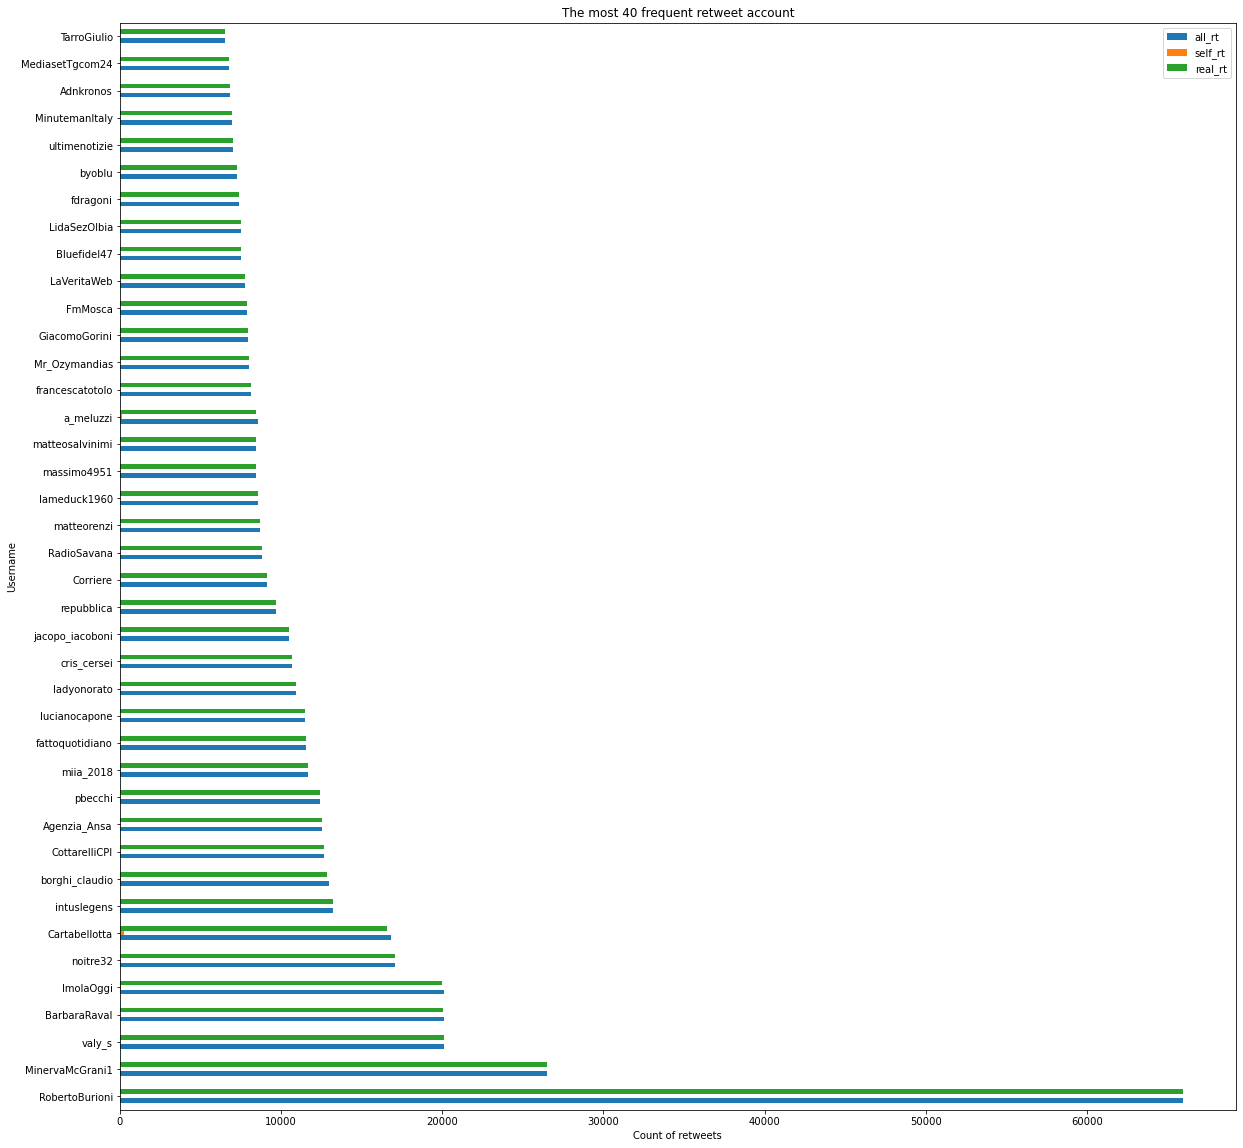

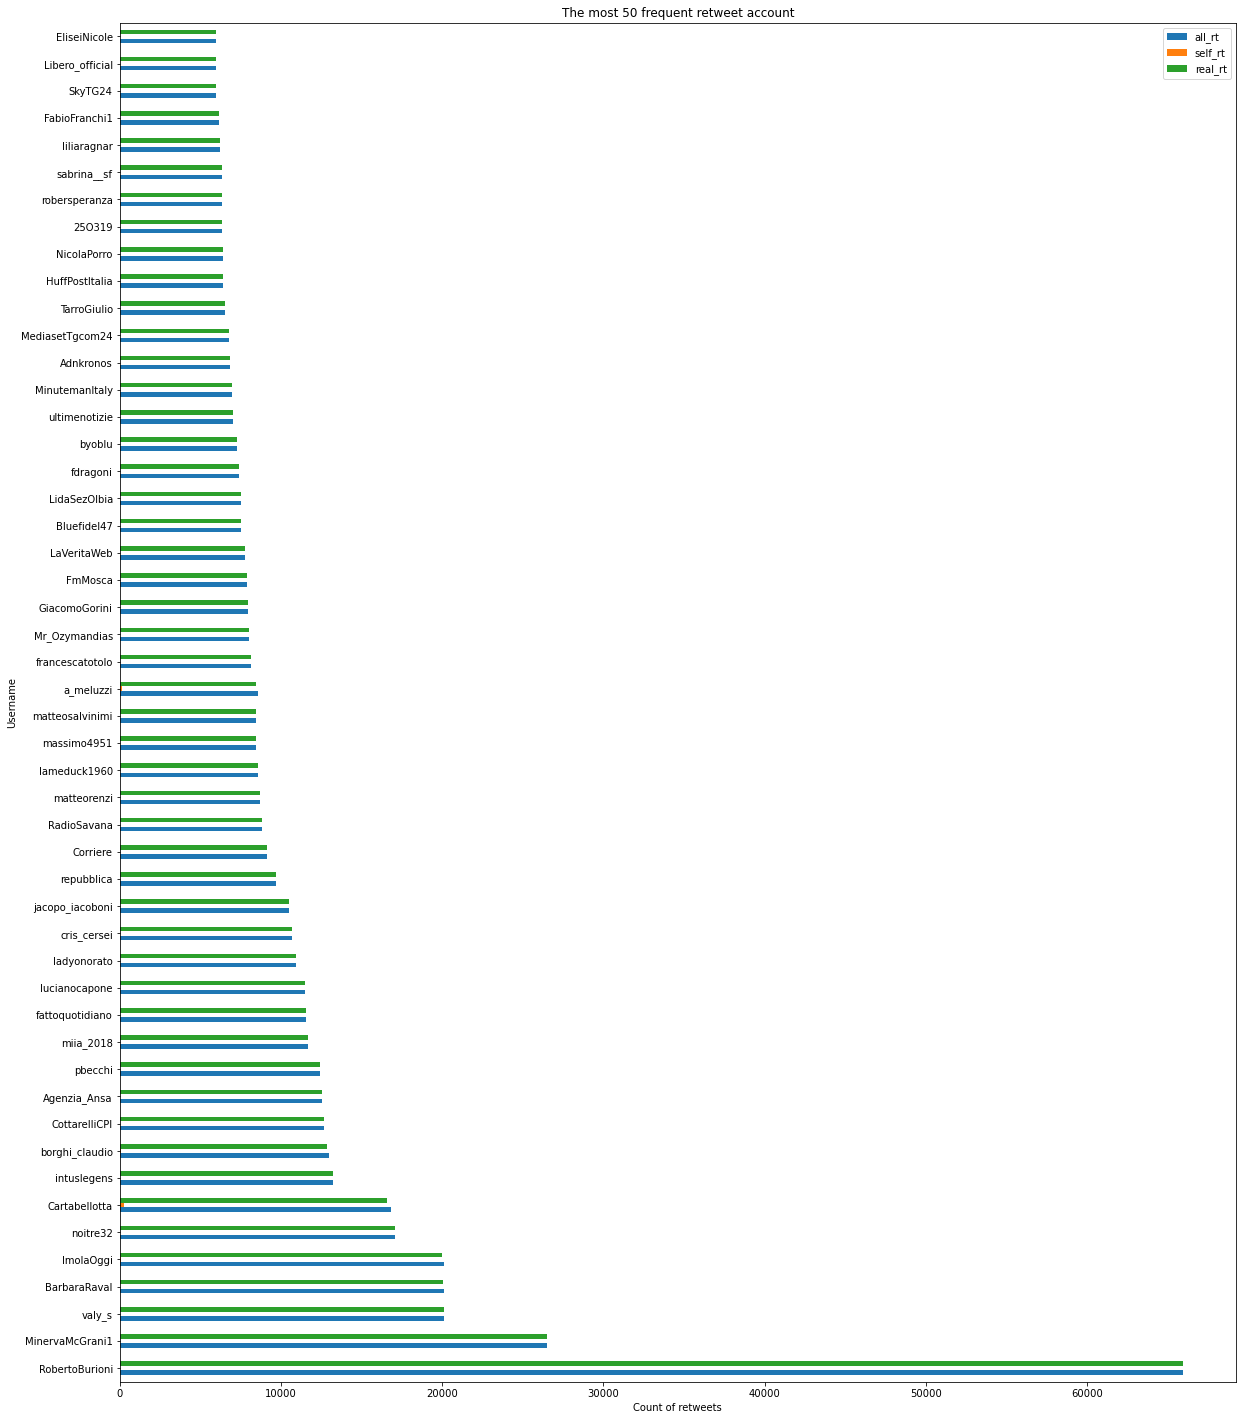

In [16]:
for i in (10,20,40,50):
    df_retweet.head(i).plot(kind='barh',figsize=(20,i/2))
    plt.title("The most %d frequent retweet account"%i)
    plt.xlabel("Count of retweets")
    plt.ylabel("Username")
    plt.show()

### Reply study

In [17]:
reply = pd.read_csv('../Tweet_split_type/reply.csv',low_memory=False)

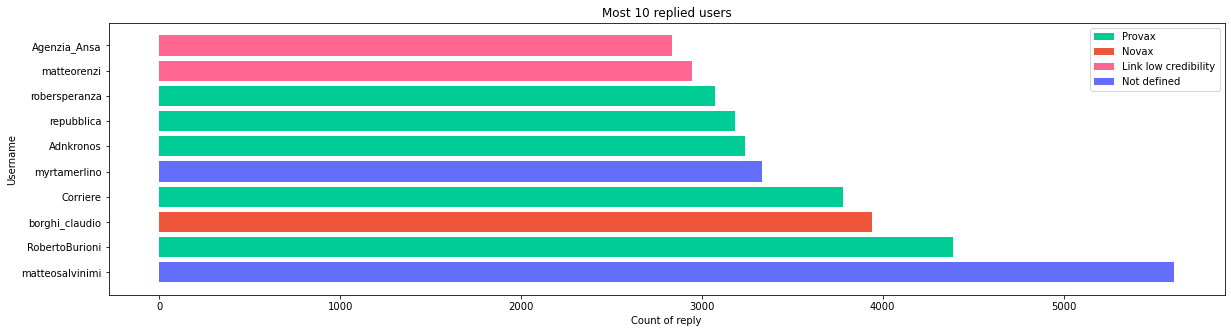

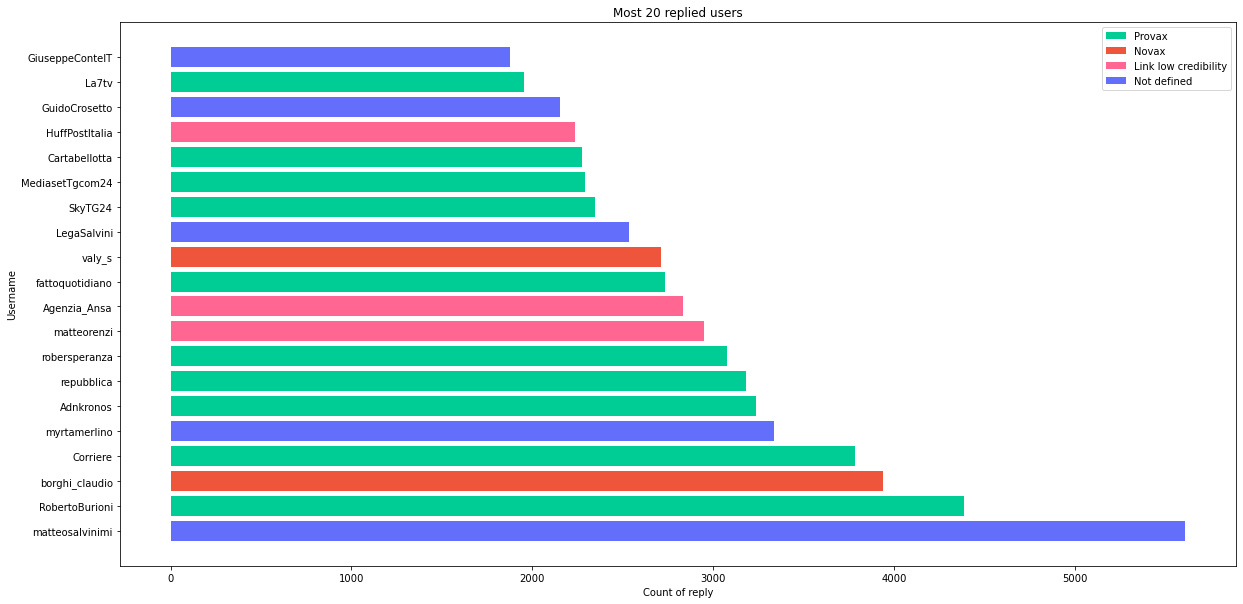

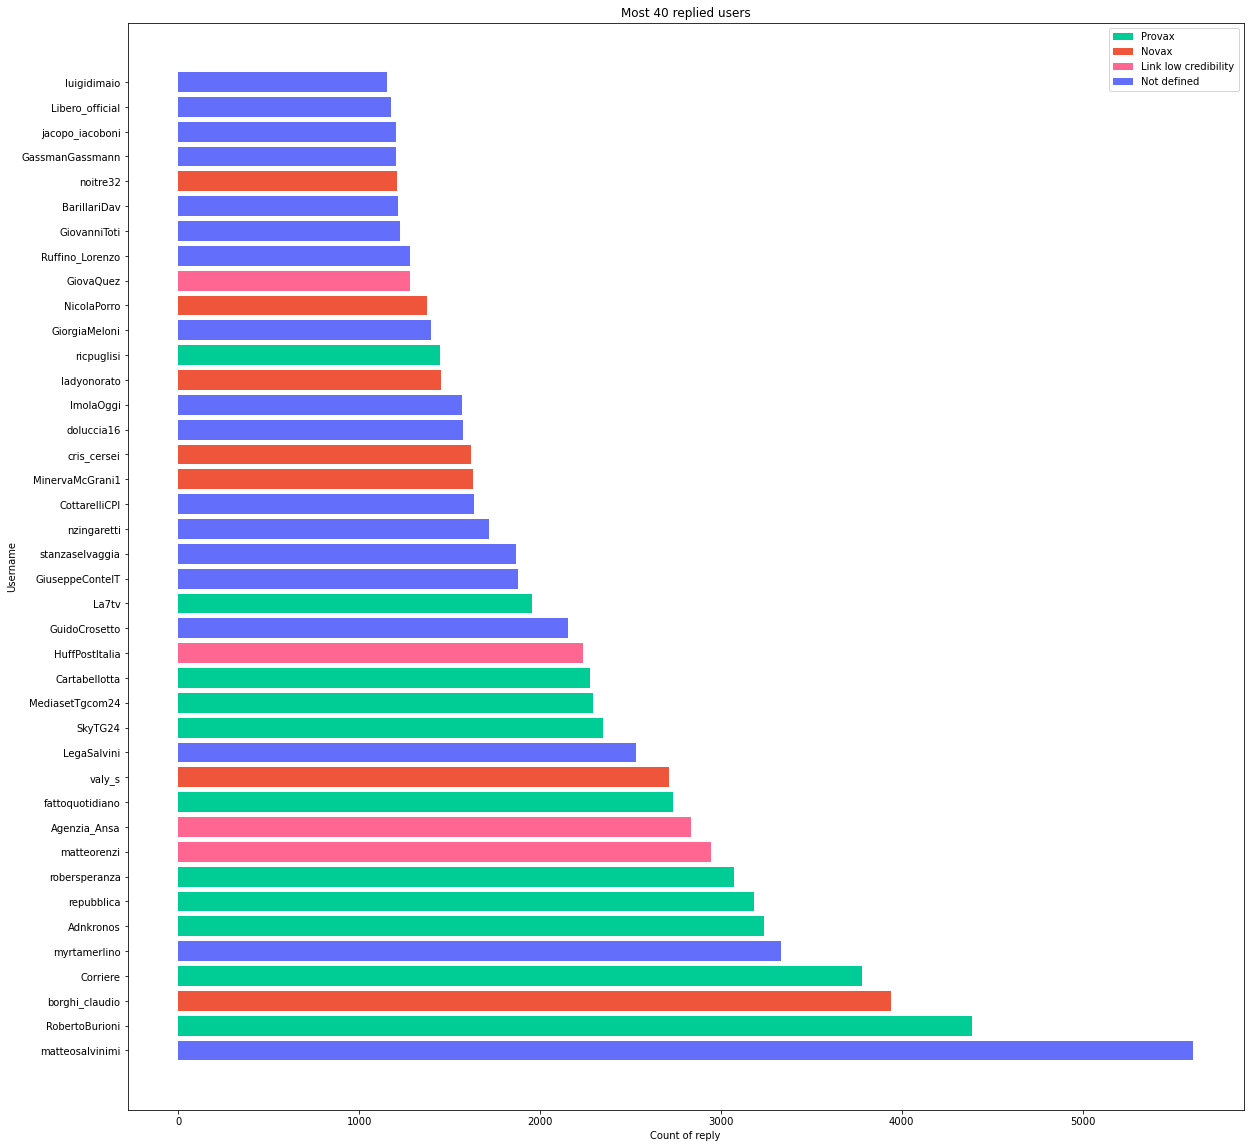

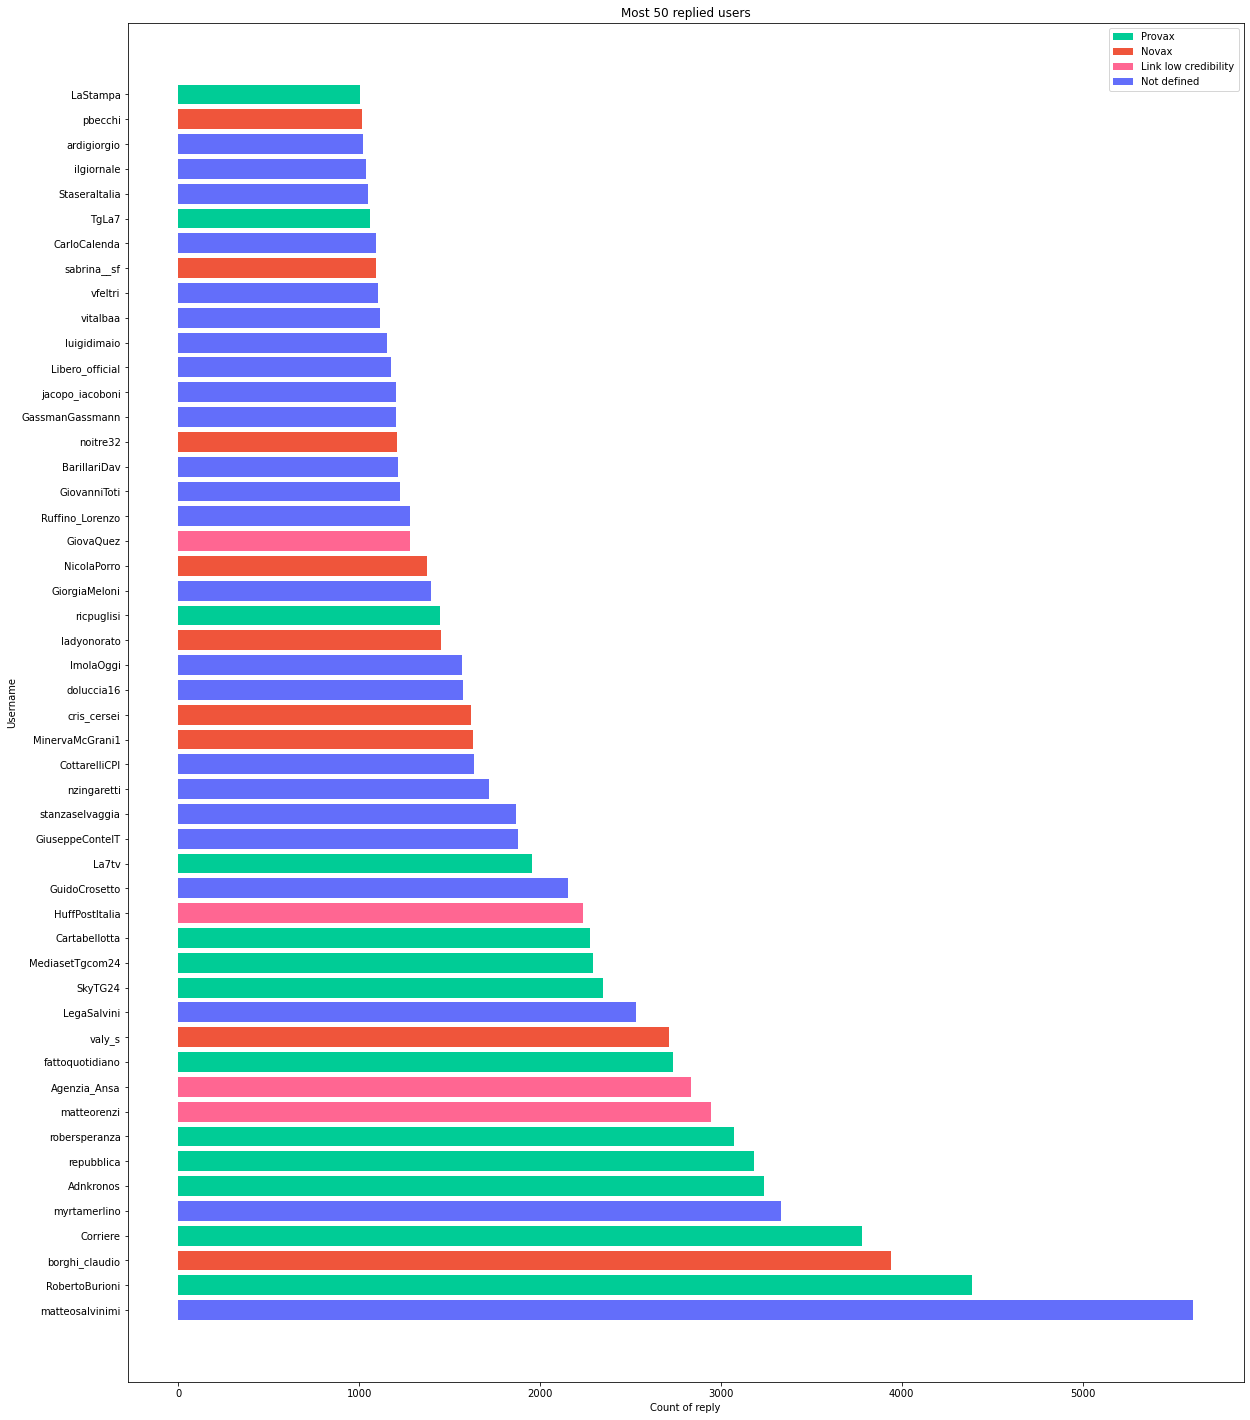

In [18]:
df_replied = ut.get_df_raggruped(reply,'reply','in_reply_to_screen_name')
df_replied = ut.add_user_type(df_replied,listNovax,listProvax,listLinkLow)[['reply','user_type']]

for i in (10,20,40,50):
        ut.print_histogram_users(df_replied,i,'reply','Most %d replied users'%i,'Count of reply')

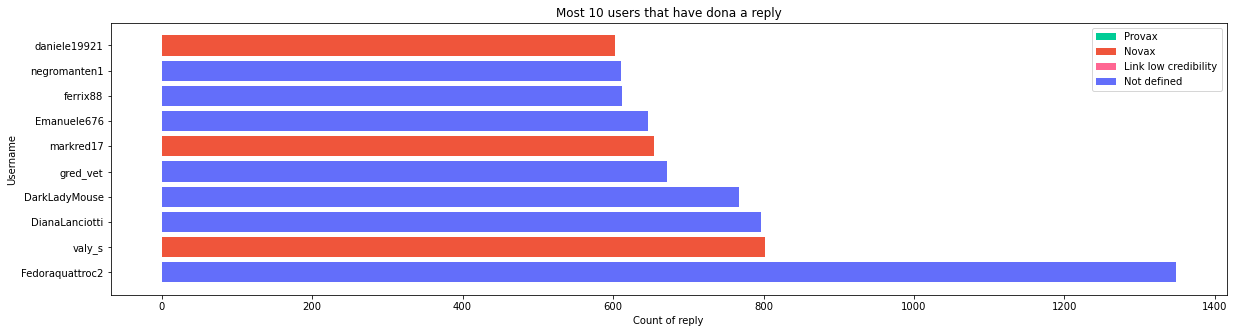

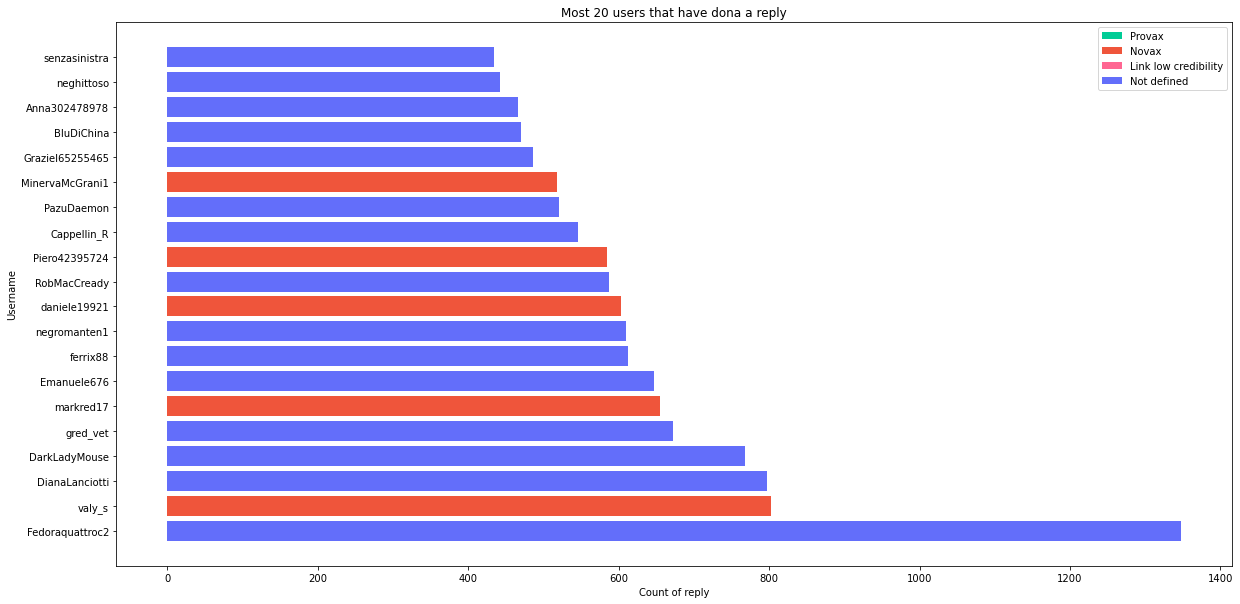

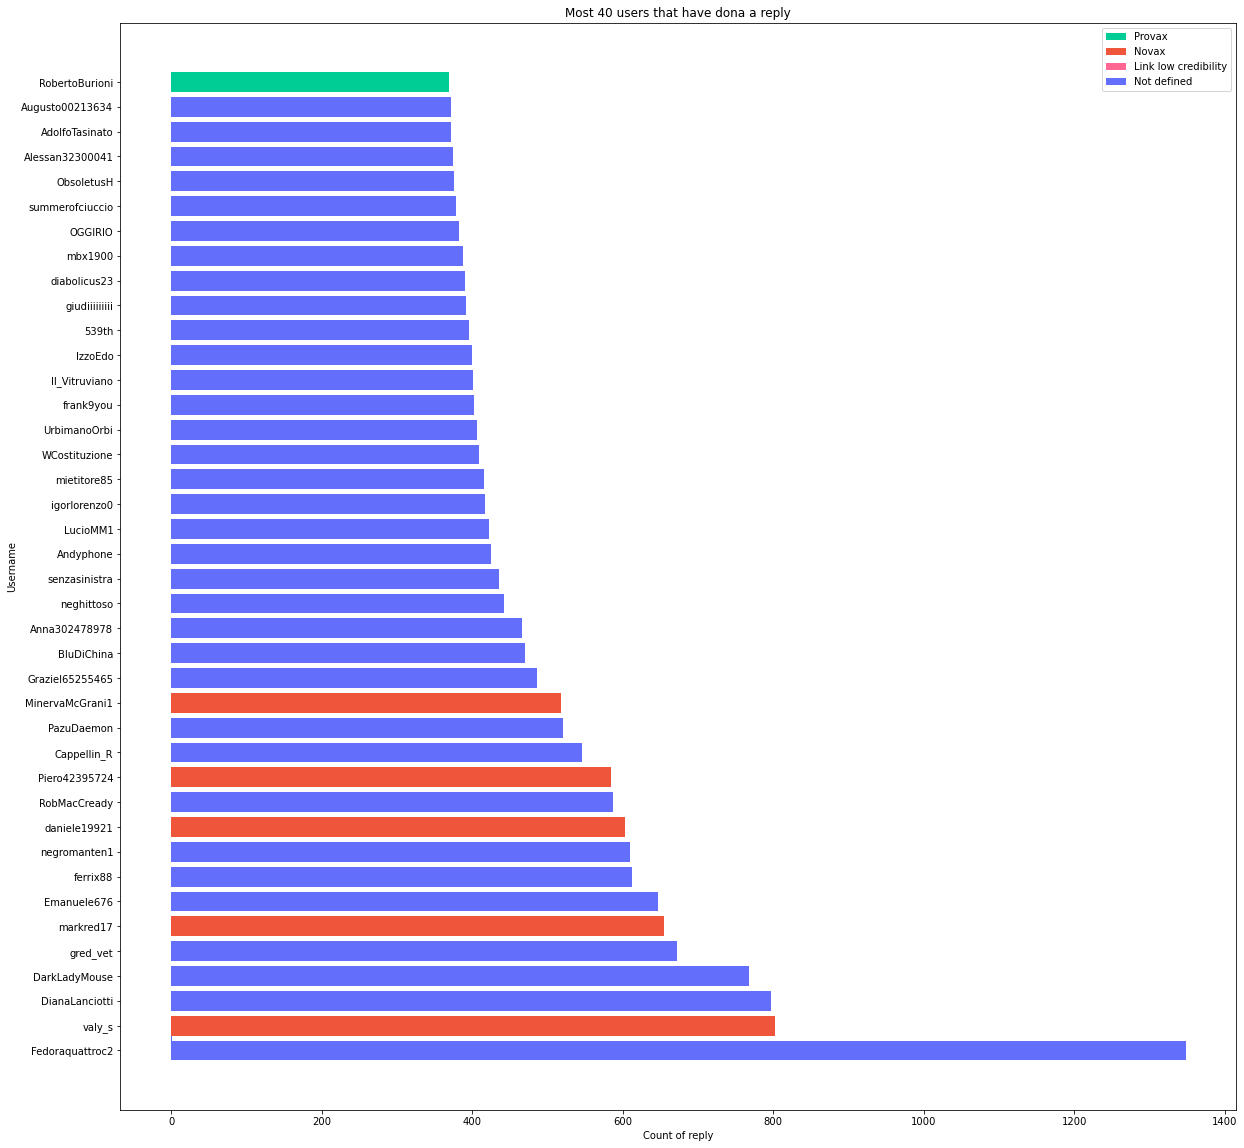

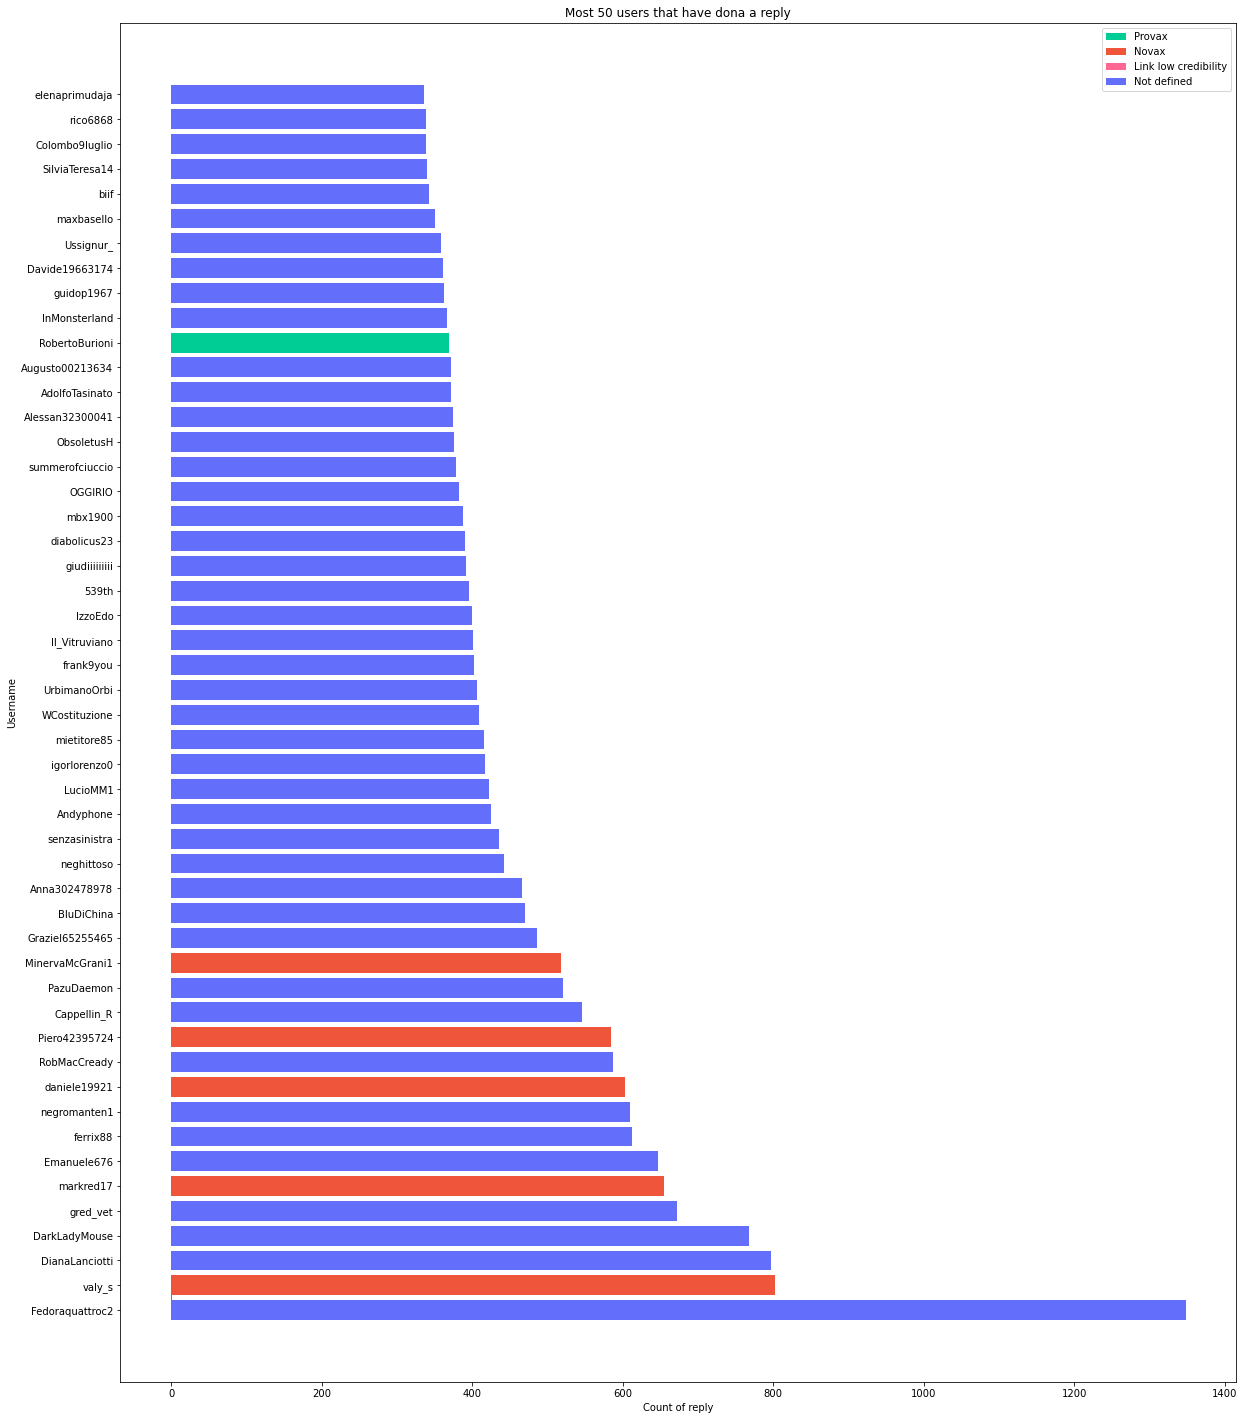

In [19]:
df_reply_done = ut.get_df_raggruped(reply,'reply','user_screen_name')
df_reply_done = ut.add_user_type(df_reply_done,listNovax,listProvax,listLinkLow)[['reply','user_type']]

for i in (10,20,40,50):
        ut.print_histogram_users(df_reply_done,i,'reply','Most %d users that have dona a reply'%i,'Count of reply')

### Quote study

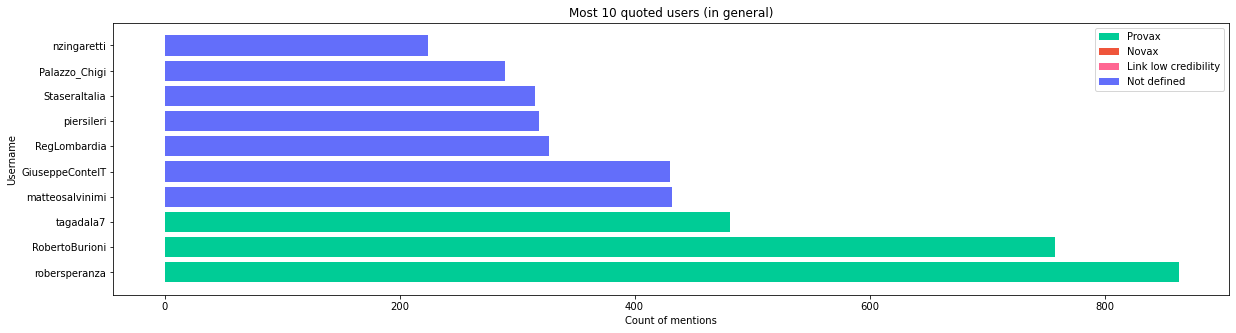

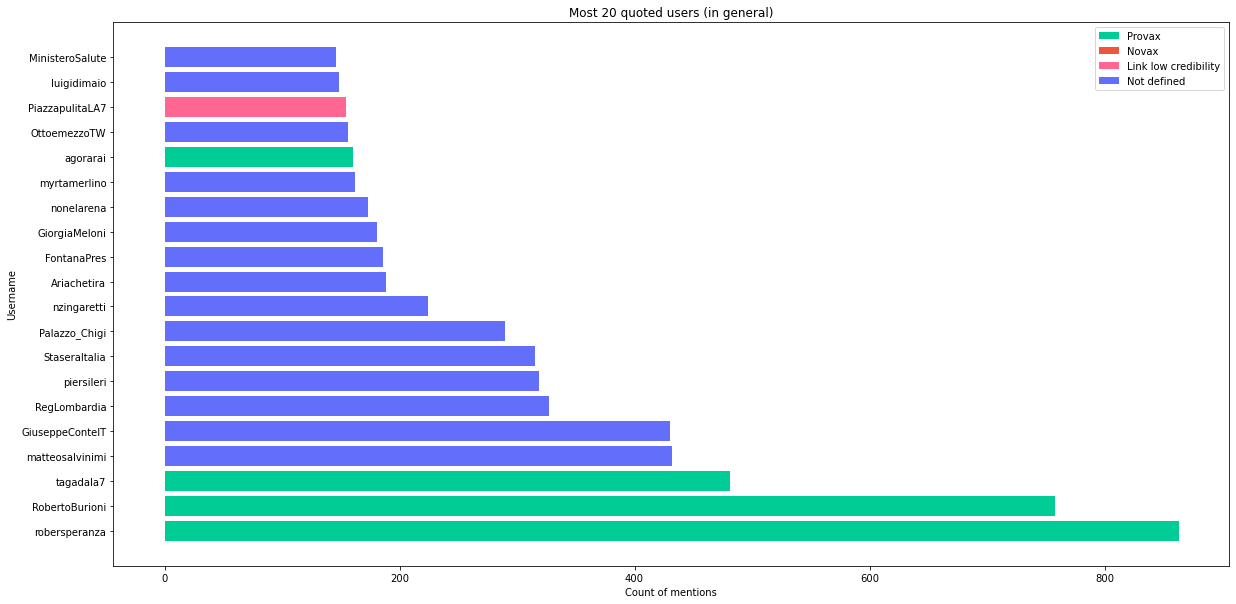

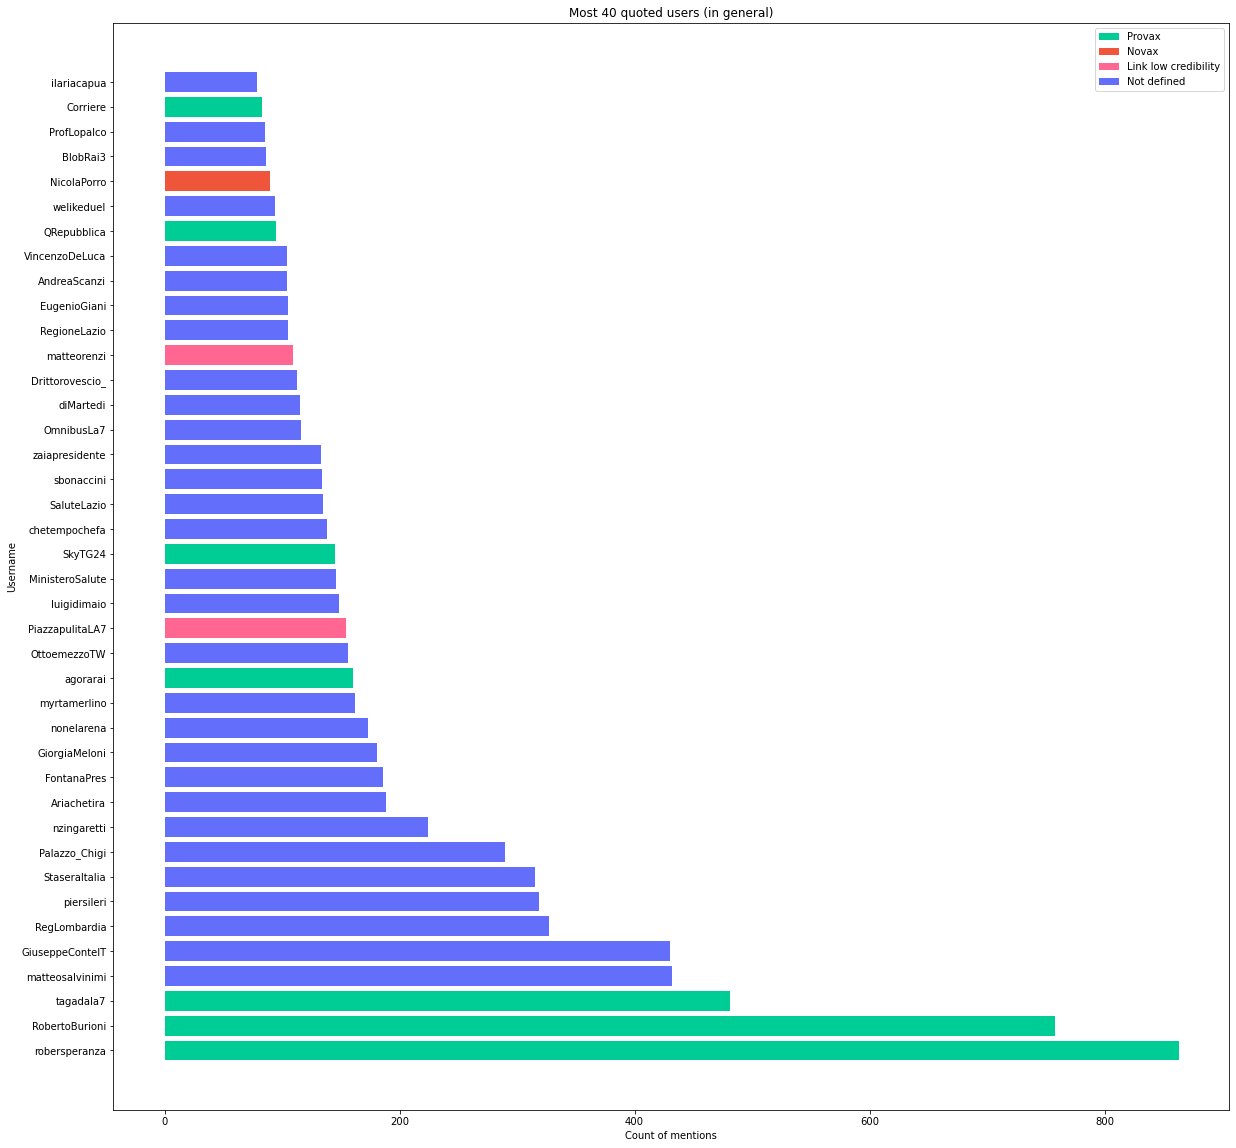

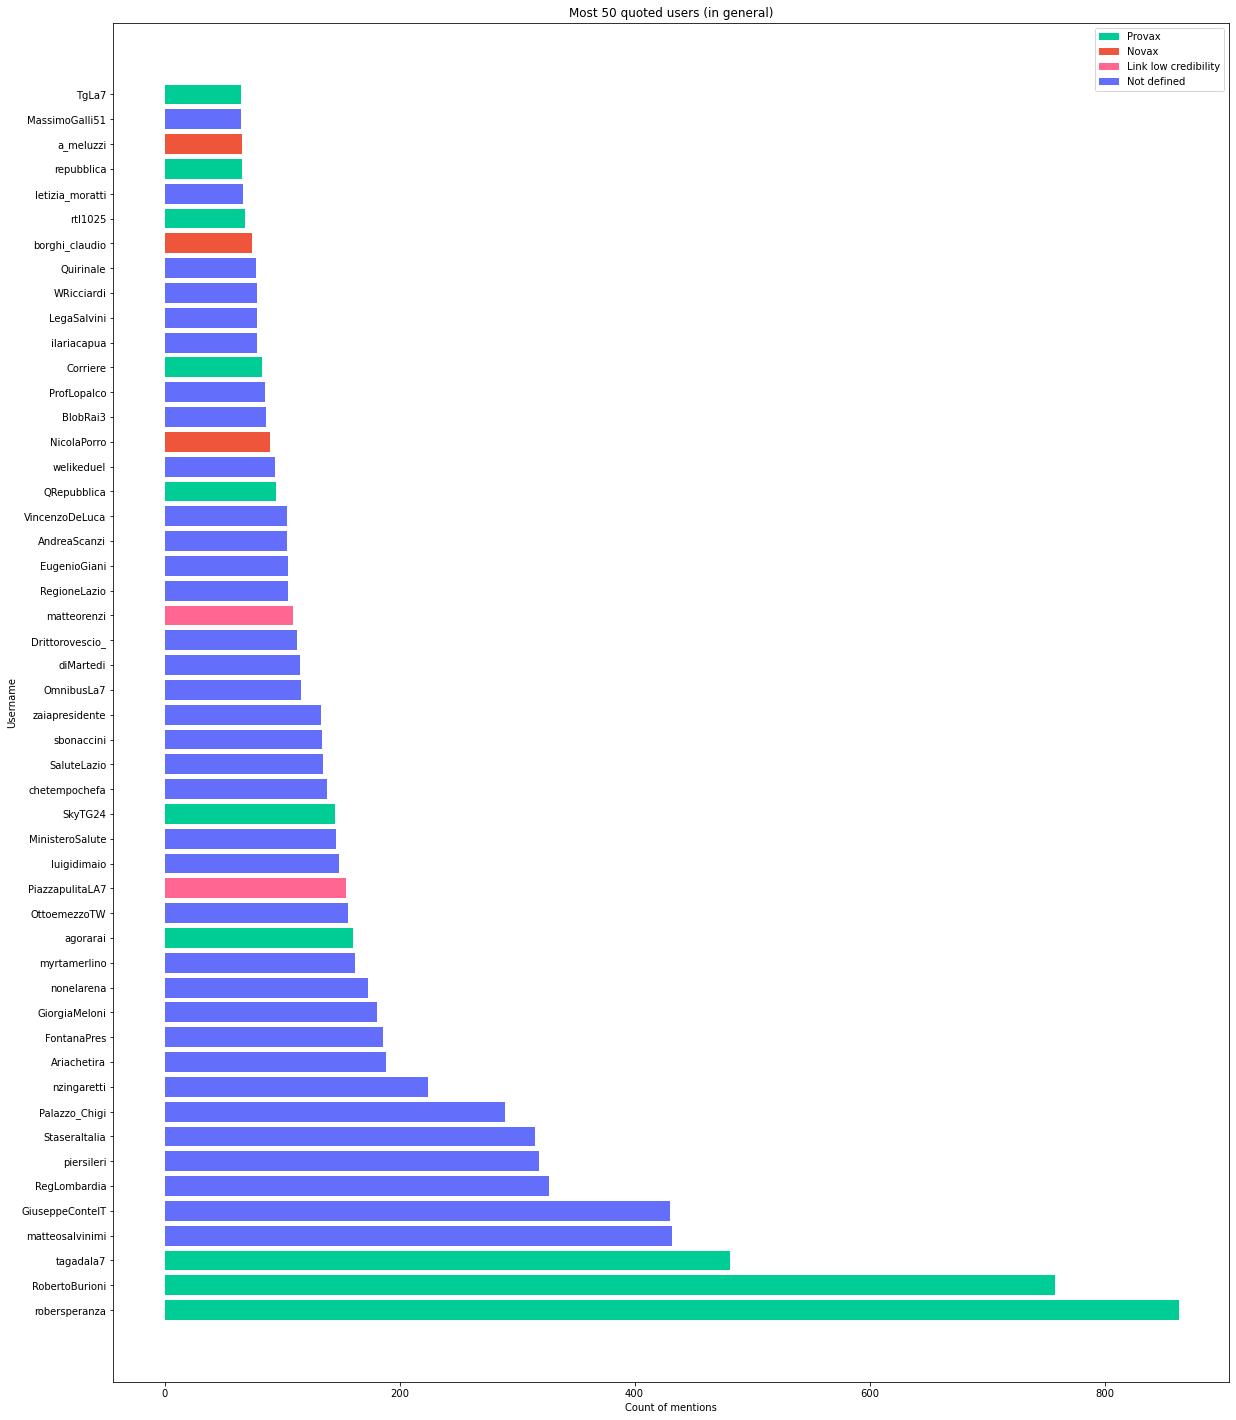

In [20]:
df_quotes = pd.read_csv('../Tweet_split_type/quotes.csv')
df_quotes = ut.get_df_raggruped(df_quotes,'quotes_count','in_reply_to_screen_name')
df_quotes = ut.add_user_type(df_quotes,listNovax,listProvax,listLinkLow)[['quotes_count','user_type']]

for i in (10,20,40,50):
        ut.print_histogram_users(df_quotes,i,'quotes_count','Most %d quoted users (in general)'%i,'Count of mentions')

### Tweets distrubution

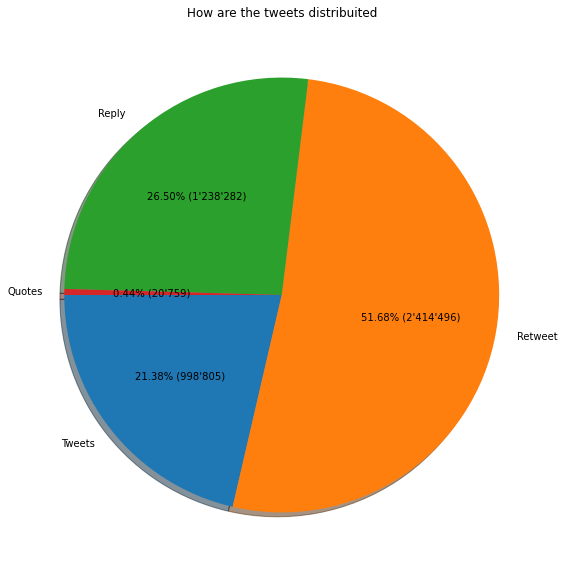

In [21]:
retweet = sum(df_retweet['all_rt'])
reply = sum(df_replied['reply']) + sum(df_reply_done['reply'])
quotes = sum(df_quotes['quotes_count'])

tweet = sum(df_tweets['tweet_count'])

values = [tweet,retweet,reply,quotes]
names = ['Tweets', 'Retweet','Reply','Quotes']

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, labels=names, autopct=lambda p:f'{p:.2f}% ({p*sum(values)/100 :,.0f})'.replace(',', '\''),
        shadow=True, startangle=180)

plt.title("How are the tweets distribuited")
plt.show()

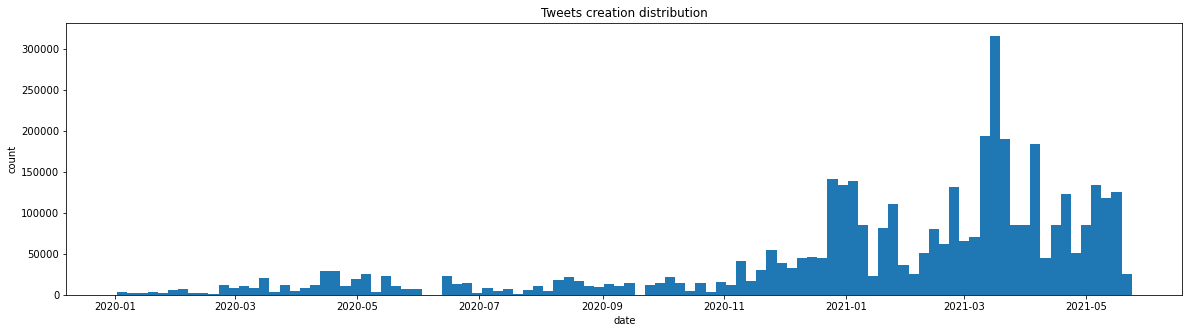

In [22]:
#Tweets creation distribution
plt.figure(figsize=(20,5))
plt.hist(df["created_at"],bins=100)
plt.xlabel('date')
plt.ylabel('count')
plt.title('Tweets creation distribution')
plt.show()

# User credibility (based on url shared)

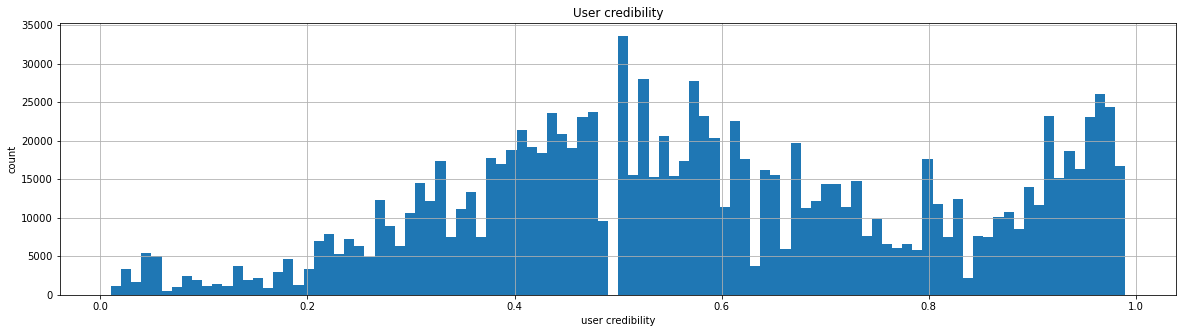

In [23]:
df1 = df[df['user_url_cred'].notna()]
user_credibility = df1.loc[df1['user_url_cred']<1,'user_url_cred']
user_credibility = user_credibility[user_credibility > 0]

plt.figure(figsize=(20,5))
user_credibility.hist(bins=100)
plt.xlabel('user credibility')
plt.ylabel('count')
plt.title('User credibility')
plt.show()